In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head(3)

,PropertyID,BHKs,FloorArea,Bathrooms,Type_of_Sale,Furnishing_Status,Locality,Price_in_Lacs,Property_URL,Image_URL,Posted_On,Last_Modified_On
0,24885041,1,500,1,New,Unfurnished,Dhakuria,25.0,https://www.magicbricks.com/propertyDetails/1-...,https://img.staticmb.com/mbphoto/property/crop...,"Apr 30, '18",35:50.4
1,33802865,1,570,2,Resale,Unfurnished,Dhakuria,25.0,https://www.magicbricks.com/propertyDetails/1-...,https://img.staticmb.com/mbphoto/property/crop...,"Apr 17, '18",35:50.5
2,31922815,1,476,1,Resale,Unfurnished,Dhakuria,18.0,https://www.magicbricks.com/propertyDetails/1-...,https://img.staticmb.com/mbphoto/property/crop...,"Jan 20, '18",35:50.6


In [2]:
df = pd.read_csv('house_data.csv')

In [10]:
df.shape

(422, 12)

In [7]:
df.columns

Index(['PropertyID', 'BHKs', 'FloorArea', 'Bathrooms', 'Type_of_Sale',
       'Furnishing_Status', 'Locality', 'Price_in_Lacs', 'Property_URL',
       'Image_URL', 'Posted_On', 'Last_Modified_On'],
      dtype='object')

In [11]:
df.dtypes

PropertyID             int64
BHKs                   int64
FloorArea              int64
Bathrooms              int64
Type_of_Sale          object
Furnishing_Status     object
Locality              object
Price_in_Lacs        float64
Property_URL          object
Image_URL             object
Posted_On             object
Last_Modified_On      object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PropertyID         422 non-null    int64  
 1   BHKs               422 non-null    int64  
 2   FloorArea          422 non-null    int64  
 3   Bathrooms          422 non-null    int64  
 4   Type_of_Sale       422 non-null    object 
 5   Furnishing_Status  422 non-null    object 
 6   Locality           422 non-null    object 
 7   Price_in_Lacs      422 non-null    float64
 8   Property_URL       422 non-null    object 
 9   Image_URL          422 non-null    object 
 10  Posted_On          422 non-null    object 
 11  Last_Modified_On   422 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 39.7+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyID,422.0,3.097668e+07,3.909848e+06,11024964.0,30548792.50,32306583.0,33358903.00,34175443.0
BHKs,422.0,2.699052e+00,1.061952e+00,1.0,2.00,3.0,3.00,5.0
FloorArea,422.0,1.422616e+03,8.683071e+02,200.0,878.25,1200.0,1764.00,6000.0
Bathrooms,422.0,2.324645e+00,9.098611e-01,1.0,2.00,2.0,3.00,5.0
Price_in_Lacs,422.0,1.151045e+02,1.421846e+02,6.0,42.30,70.0,137.25,1100.0


In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

In [9]:
df.isnull().sum()

PropertyID           0
BHKs                 0
FloorArea            0
Bathrooms            0
Type_of_Sale         0
Furnishing_Status    0
Locality             0
Price_in_Lacs        0
Property_URL         0
Image_URL            0
Posted_On            0
Last_Modified_On     0
dtype: int64

* NO missing value is there in the datasets.

In [12]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,PropertyID,BHKs,FloorArea,Bathrooms,Price_in_Lacs
0,24885041,1,500,1,25.0
1,33802865,1,570,2,25.0
2,31922815,1,476,1,18.0
3,33838245,1,550,1,20.0
4,25692697,1,475,1,26.7


In [23]:
for i in df[numerical_features].columns:
    print('The number of unique values in {} is {}'.format(i,df[i].nunique()))

The number of unique values in PropertyID is 422
The number of unique values in BHKs is 5
The number of unique values in FloorArea is 261
The number of unique values in Bathrooms is 5
The number of unique values in Price_in_Lacs is 235


In [24]:
df1 = df.copy()

In [25]:
#as in PropertyID all values are unique,we will drop that column

df1 = df1.drop('PropertyID',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000153BC630>,
      dtype=object)

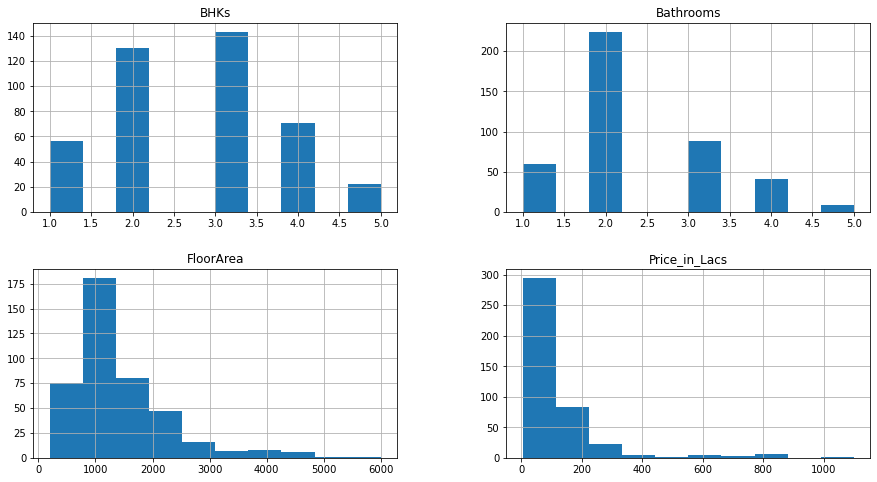

In [26]:
df1.hist(figsize=(15,8))

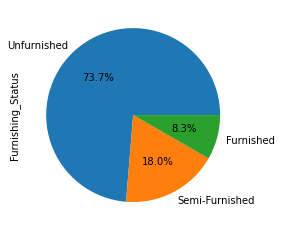

In [27]:
df1['Furnishing_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

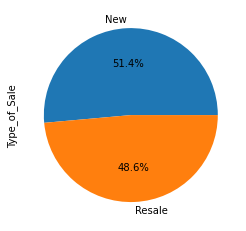

In [18]:
df['Type_of_Sale'].value_counts().plot(kind='pie', autopct='%1.1f%%')

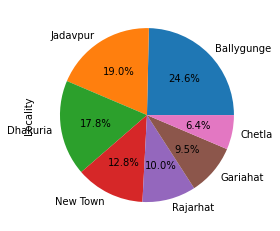

In [19]:
df['Locality'].value_counts().plot(kind='pie', autopct='%1.1f%%')

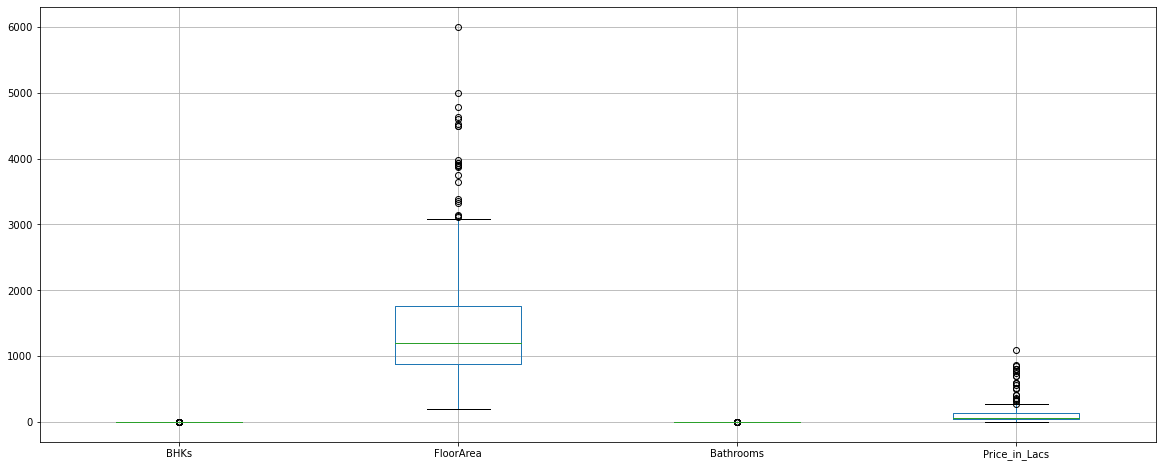

In [30]:
df1.boxplot(figsize=(20,8))

* A lots of outliers present in both 'Floor Area' and 'Price_in_Lacs' columns.

In [38]:
for i in df1[cat_features].columns:
    print('The number of unique values in {} is {}'.format(i,df1[i].nunique()))

The number of unique values in Type_of_Sale is 2
The number of unique values in Furnishing_Status is 3
The number of unique values in Locality is 7
The number of unique values in Property_URL is 422
The number of unique values in Image_URL is 386
The number of unique values in Posted_On is 103
The number of unique values in Last_Modified_On is 400


In [39]:
#as there are all data in 'Property_URL' and 'Last_Modified_On' that needs to be drop.
df1 = df1.drop('Property_URL',axis=1)
df1 = df1.drop('Last_Modified_On',axis=1)

In [44]:
df1 = df1.drop('Image_URL',axis=1)

In [45]:
df1.head(3)

,BHKs,FloorArea,Bathrooms,Type_of_Sale,Furnishing_Status,Locality,Price_in_Lacs,Posted_On
0,1,500,1,New,Unfurnished,Dhakuria,25.0,"Apr 30, '18"
1,1,570,2,Resale,Unfurnished,Dhakuria,25.0,"Apr 17, '18"
2,1,476,1,Resale,Unfurnished,Dhakuria,18.0,"Jan 20, '18"


In [49]:
# list of numerical variables
cat_features = [feature for feature in df1.columns if df1[feature].dtypes == 'O']

print('Categorical of numerical variables: ', len(cat_features))

# visualise the numerical variables
df1[cat_features].head()

Categorical of numerical variables:  4


,Type_of_Sale,Furnishing_Status,Locality,Posted_On
0,New,Unfurnished,Dhakuria,"Apr 30, '18"
1,Resale,Unfurnished,Dhakuria,"Apr 17, '18"
2,Resale,Unfurnished,Dhakuria,"Jan 20, '18"
3,Resale,Furnished,Dhakuria,"Apr 18, '18"
4,New,Unfurnished,Dhakuria,"Apr 06, '18"


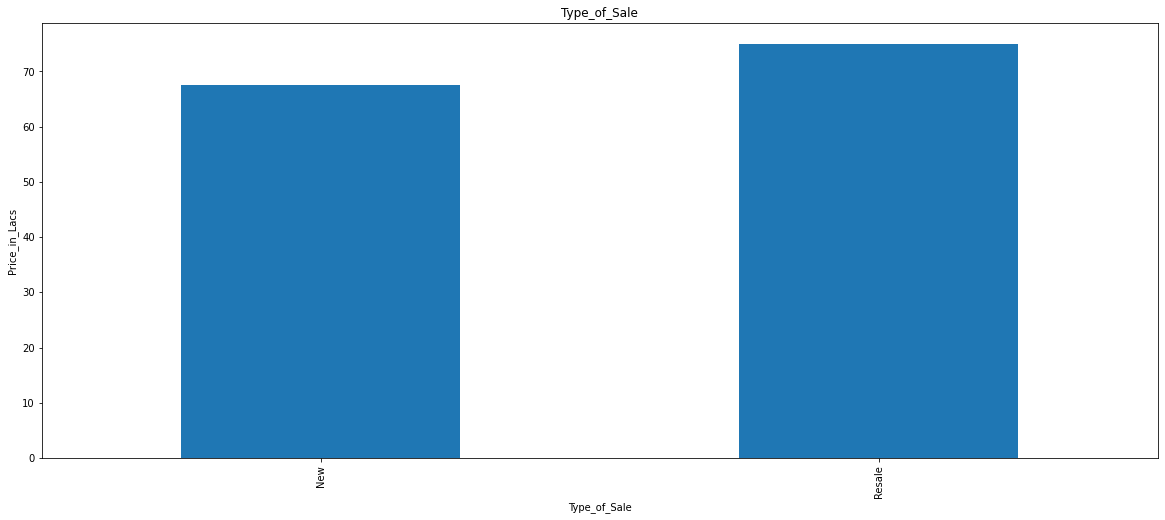

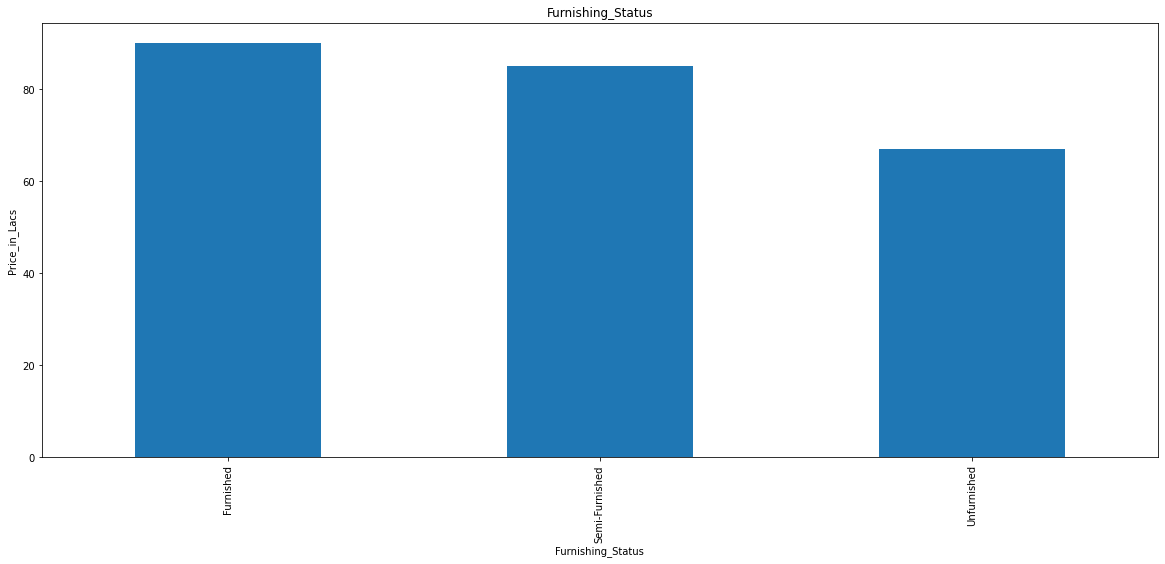

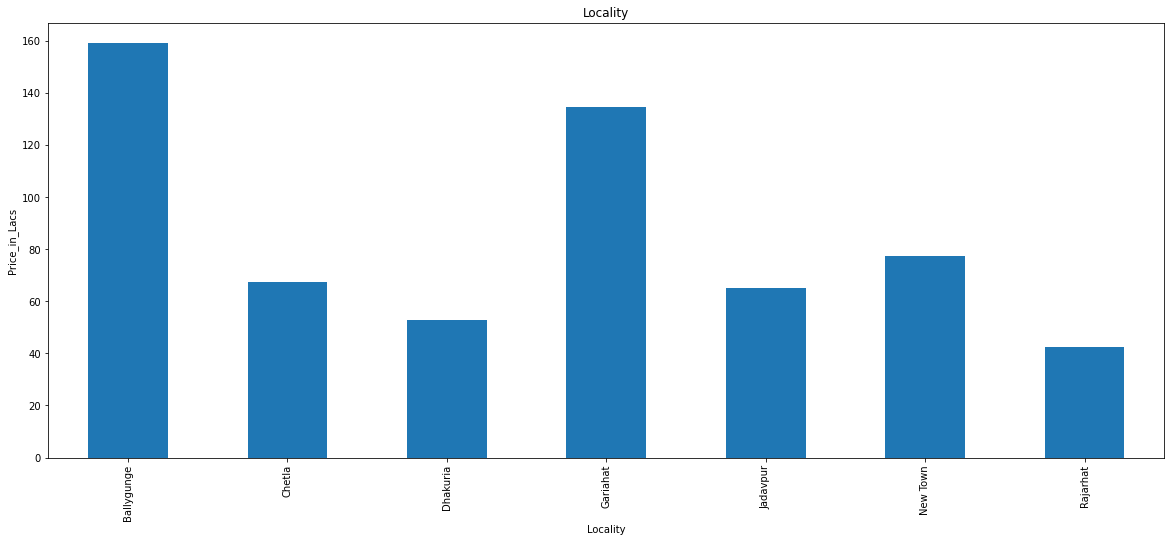

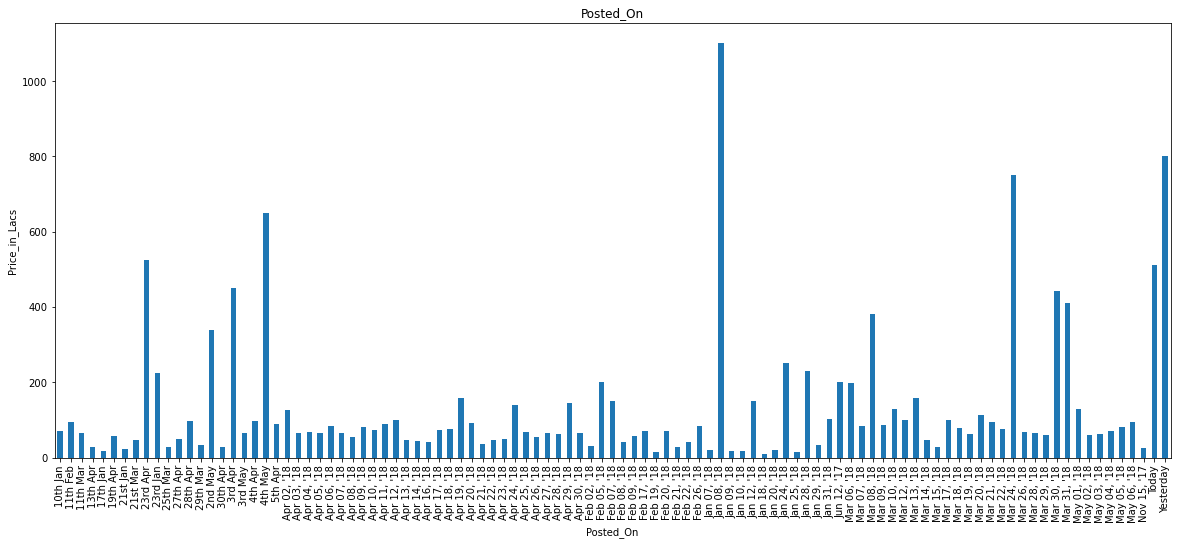

In [48]:

for feature in cat_features:
    df1.groupby(feature)['Price_in_Lacs'].median().plot.bar(figsize=(20,8))
    plt.xlabel(feature)
    plt.ylabel('Price_in_Lacs')
    plt.title(feature)
    plt.show()

* Prices are varing according to the the Number of BHKs.The price is high for the higher number of BHKs.
* Resale price is more than the sale price.
* Unfurnished price is less compared to others.
* 'Balygunge' and 'Gariahat' location have more price compared to other location.
* In some particular 'posted_on' date the price is higher.